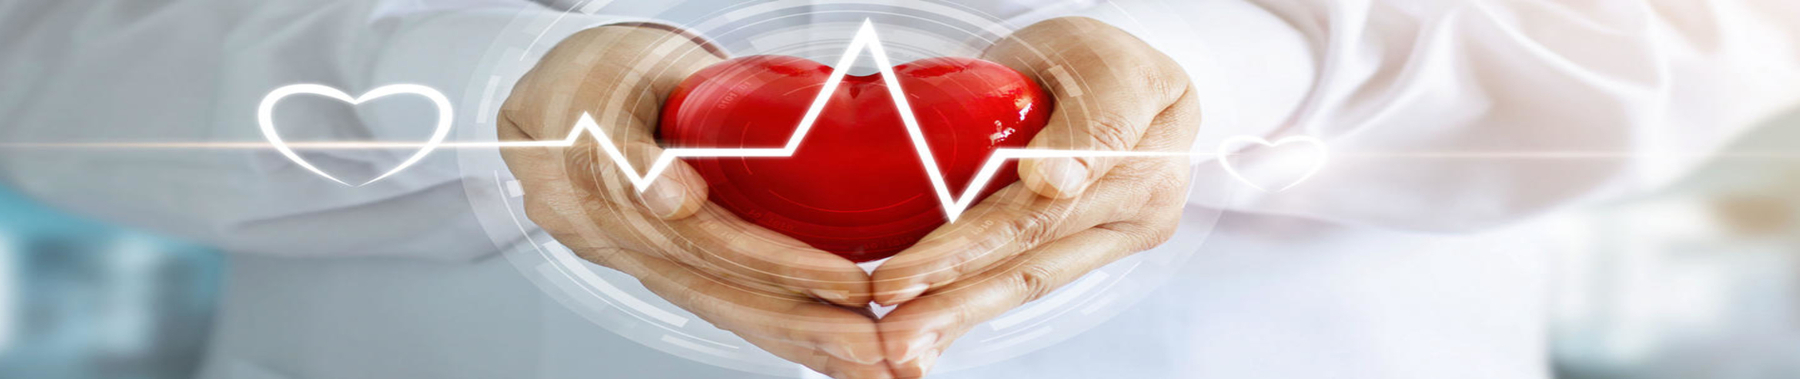

## **Análise exploratória de dados e predição- Ataques cardíacos**

Este projeto tem como objetivo realizar uma análise preditiva e exploração de dados utilizando um conjunto de informações de 303 pacientes com relação a ataques cardíacos. Os dados incluem variáveis como pressão arterial em repouso, tipo de dor no peito, glicemia em jejum, sexo, idade e colesterol. Através do uso de técnicas de análise de dados e aprendizado de máquina em Python, buscaremos compreender os padrões e relacionamentos existentes nos dados, bem como construir um modelo preditivo capaz de identificar a probabilidade de ocorrência de um ataque cardíaco com base nessas características. 

Compreender e prever fatores de risco para ataques cardíacos pode auxiliar na prevenção e no tratamento adequado dessas condições, contribuindo para uma melhor qualidade de vida e bem-estar dos pacientes.

Os dados utilizados foram retirados do Kaggle e esta disponível no ([link](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset))

O projeto está dividido nas seguintes etapas:

* Importação de pacotes e blibiotecas
* Exploração e análise de dados
* Manipulação

**Dashboard:**

*  Power BI: ([link](https://app.powerbi.com/view?r=eyJrIjoiYTIyM2JiMGItNTU2NC00NzA4LWE0OTktZjk4YzQ1NzcwNTNhIiwidCI6ImI1NGE0YTY2LTk1YjMtNDRlNC04OGI3LWVlZGYzZDRkZDIyOSJ9))


# Dados:

* idade: idade do paciente 
* sexo: sexo do paciente,

    1= masculino
    0= feminino
    
* tipo_de_dor_no_peito: Tipo de dor no peito, onde

    0: angina típica
    
    1: angina atípica
    
    2: dor não anginosa
   
    3: assintomático
    
* pressao_arterial: pressão arterial em repouso (em mm Hg)
* colesterol: colesterol em mg/dl
* glicemia: glicemia em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso)
* output: resultado (0 = menor chance de ataque cardíaco; 1 = maior chance de ataque cardíaco)

# Importação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
dados = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

# Exploração e análise

In [3]:
dados= dados.rename(columns={'age':'idade','sex':'sexo','cp':'tipo_de_dor_no_peito','trtbps':'pressao_arterial','chol':'colesterol','fbs':'glicemia'})
dados = dados[['idade','sexo','tipo_de_dor_no_peito','pressao_arterial','colesterol','glicemia','output']]
dados.head()

,idade,sexo,tipo_de_dor_no_peito,pressao_arterial,colesterol,glicemia,output
0,63,1,3,145,233,1,1
1,37,1,2,130,250,0,1
2,41,0,1,130,204,0,1
3,56,1,1,120,236,0,1
4,57,0,0,120,354,0,1


In [4]:
dados.tail()

,idade,sexo,tipo_de_dor_no_peito,pressao_arterial,colesterol,glicemia,output
298,57,0,0,140,241,0,0
299,45,1,3,110,264,0,0
300,68,1,0,144,193,1,0
301,57,1,0,130,131,0,0
302,57,0,1,130,236,0,0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   idade                 303 non-null    int64
 1   sexo                  303 non-null    int64
 2   tipo_de_dor_no_peito  303 non-null    int64
 3   pressao_arterial      303 non-null    int64
 4   colesterol            303 non-null    int64
 5   glicemia              303 non-null    int64
 6   output                303 non-null    int64
dtypes: int64(7)
memory usage: 16.7 KB


* A base de dados não possui dados nulos.

In [6]:
dados.shape

(303, 7)

In [7]:
dados.describe()

,idade,sexo,tipo_de_dor_no_peito,pressao_arterial,colesterol,glicemia,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,1.000000


In [8]:
dados.columns

Index(['idade', 'sexo', 'tipo_de_dor_no_peito', 'pressao_arterial',
       'colesterol', 'glicemia', 'output'],
      dtype='object')

[Text(0.5, 1.0, 'Distribuição por idade'),
 Text(0.5, 0, 'idade'),
 Text(0, 0.5, 'Número de pacientes')]

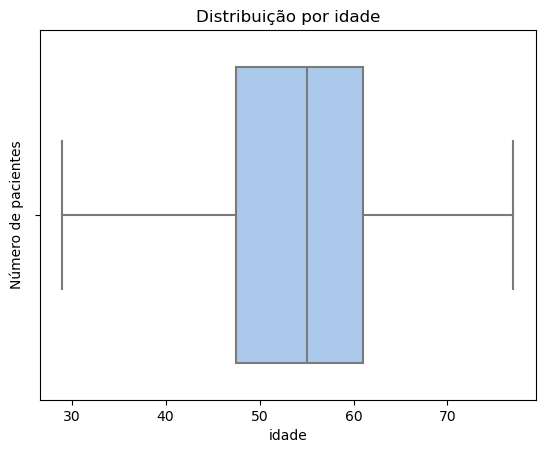

In [9]:
grafico= sns.boxplot(data=dados, x='idade',palette= 'pastel');
grafico.set(title='Distribuição por idade',xlabel='idade', ylabel='Número de pacientes')

* A idade do paciente mais novo é 29 anos e do mais velho é 77 anos, 25% dos pacientes possuem até 47 anos, o valor mediano das idades é de 55 anos e 75% dos pacientes possuem idade de até 61 anos.

In [10]:
sexo = dados['sexo'].value_counts()
porcentagem = dados['sexo'].value_counts(normalize=True) * 100
sexo_df = pd.DataFrame({'Sexo': sexo.index, 'Número de pacientes': sexo, 'Porcentagem': porcentagem})
sexo_df

,Sexo,Número de pacientes,Porcentagem
1,1,207,68.316832
0,0,96,31.683168


[Text(0.5, 1.0, 'Distribuição por sexo'),
 Text(0.5, 0, 'Sexo'),
 Text(0, 0.5, 'Número de pacientes')]

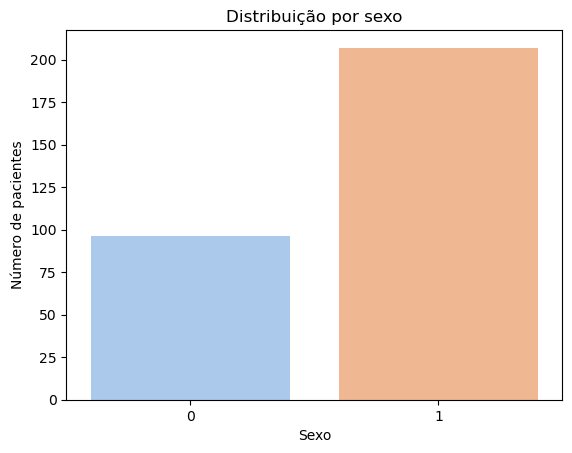

In [11]:
grafico= sns.countplot(data=dados, x='sexo',palette= 'pastel');
grafico.set(title='Distribuição por sexo',xlabel='Sexo', ylabel='Número de pacientes')


* Dos 303 pacientes, 207 são do sexo masculino(1) e 96 são do sexo feminino(0), em porcentagem temos 68% do sexo masculino e 32% do sexo feminino.

In [12]:
tipo_de_dor_no_peito = dados['tipo_de_dor_no_peito'].value_counts()
porcentagem = dados['tipo_de_dor_no_peito'].value_counts(normalize=True) * 100
tipo_de_dor_no_peito_df = pd.DataFrame({'Tipo de dor no peito': tipo_de_dor_no_peito.index, 'Número de pacientes': tipo_de_dor_no_peito, 'Porcentagem': porcentagem})
tipo_de_dor_no_peito_df

,Tipo de dor no peito,Número de pacientes,Porcentagem
0,0,143,47.194719
2,2,87,28.712871
1,1,50,16.501650
3,3,23,7.590759


[Text(0.5, 1.0, 'Distribuição por tipo de dor no peito'),
 Text(0.5, 0, 'Tipo de dor no peito'),
 Text(0, 0.5, 'Número de pacientes')]

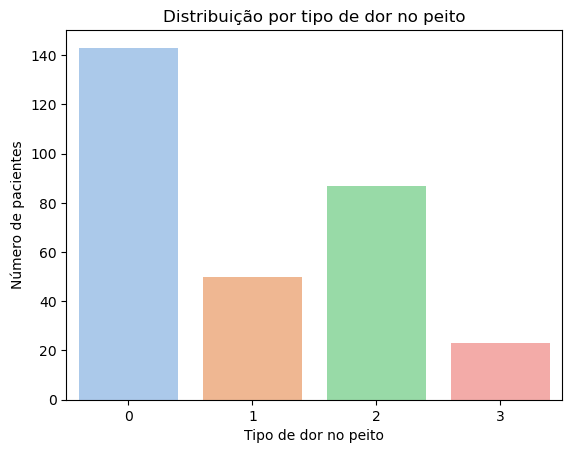

In [13]:
grafico= sns.countplot(data=dados, x='tipo_de_dor_no_peito',palette= 'pastel');
grafico.set(title='Distribuição por tipo de dor no peito',xlabel='Tipo de dor no peito', ylabel='Número de pacientes')

* Temos 143(47%) pacientes que apresentam dor no peito do tipo (0) angina típica, 87(29%) do tipo (2) dor não anginosa, 50(16%) do tipo(1) angina atípica e 23 (8%) do tipo (3) que são assintomáticos.

[Text(0.5, 1.0, 'Pressão arterial'),
 Text(0.5, 0, 'Pressão arterial em repouso mmHg'),
 Text(0, 0.5, 'Número de pacientes')]

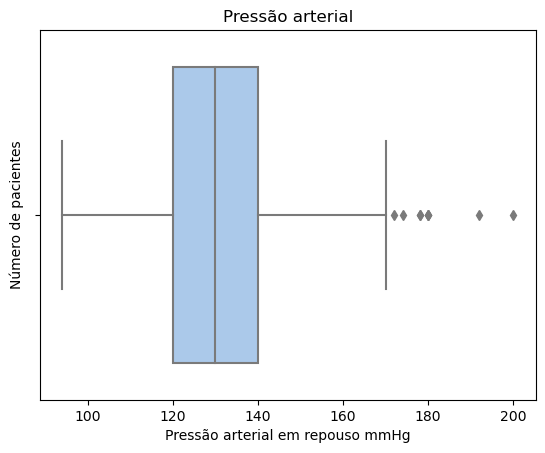

In [14]:
grafico= sns.boxplot(data=dados, x='pressao_arterial',palette= 'pastel');
grafico.set(title='Pressão arterial',xlabel='Pressão arterial em repouso mmHg', ylabel='Número de pacientes')

* O menor valor de pressão arterial em repouso entre os pacientes é de 94 mmHg e o maior é 200 mmHg, 25% dos pacientes apresentam valores até 120 mmHg, 50% até 130 mmHg e 75% até 140 mmHg, ou seja,75 pacientes (25%) estão com a pressao arterial em repouso maior que 140 mmHg.



In [15]:
dados.groupby('sexo')['colesterol'].describe()


,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
0,96.0,261.302083,65.088946,141.0,214.75,253.0,296.75,564.0
1,207.0,239.289855,42.782392,126.0,208.00,235.0,268.00,353.0


[Text(0.5, 1.0, 'Colesterol'),
 Text(0.5, 0, 'Sexo'),
 Text(0, 0.5, 'Colesterol mg/dl')]

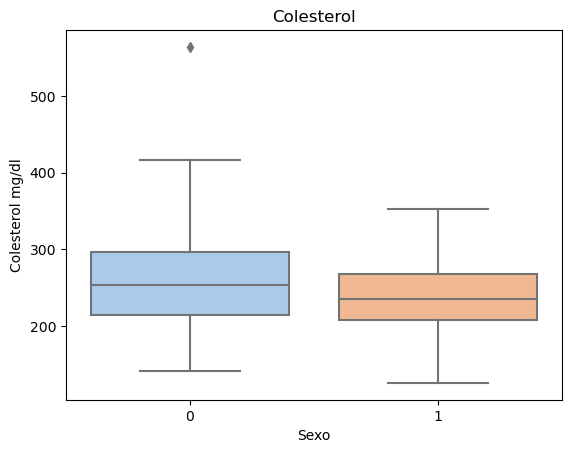

In [16]:
grafico= sns.boxplot(data=dados, x='sexo', y='colesterol',palette= 'pastel');
grafico.set(title='Colesterol',xlabel='Sexo', ylabel='Colesterol mg/dl')

* O menor valor de colesterol (126mg/dl) pertence a um paciente do sexo masculino  e o maior (564mg/dl) pertence a uma paciente do sexo feminino. A média de valores de colesterol das pacientes do sexo feminino é 261mg/dl e dos pacientes do sexo masculino é de 239mg/dl, ou seja, 8,5% maior, podemos observar melhor essa diferença também através do boxplot, onde 25% dos pacientes do sexo feminino apresentam colesterol de até 214mg/dl, 50% de até 253 mg/dl e 75% até 296mg/dl, já para os pacientes do sexo masculino, 25% apresentam colesterol de até 208mg/dl, 50% até 235mg/dl e 75% até 268mg/dl. 

In [17]:
glicemia = dados['glicemia'].value_counts()
porcentagem = dados['glicemia'].value_counts(normalize=True) * 100
glicemia_df = pd.DataFrame({'glicemia': glicemia.index, 'Número de pacientes': glicemia, 'Porcentagem': porcentagem})
glicemia_df

,glicemia,Número de pacientes,Porcentagem
0,0,258,85.148515
1,1,45,14.851485


Text(0.5, 1.0, 'Distribuição pela glicemia em jejum (1= >120 mg/dl, 0= <120mg/dl)')

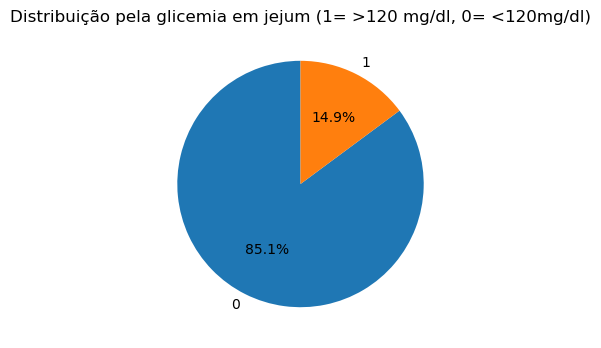

In [18]:
plt.figure(figsize=(4, 4))
plt.pie(glicemia_df['Número de pacientes'], labels= glicemia_df['glicemia'],autopct='%1.1f%%', startangle=90)
plt.title('Distribuição pela glicemia em jejum (1= >120 mg/dl, 0= <120mg/dl)')

* Com relação à glicemia em jejum, temos que 85,1% dos pacientes possue resultado em jejum abaixo de 120mg/dl e 14,9% a cima de 120mg/dl.

In [19]:
dados.groupby('sexo')['output'].value_counts()

sexo  output
0     1          72
      0          24
1     0         114
      1          93
Name: output, dtype: int64

In [20]:
dados.groupby('tipo_de_dor_no_peito')['output'].value_counts()

tipo_de_dor_no_peito  output
0                     0         104
                      1          39
1                     1          41
                      0           9
2                     1          69
                      0          18
3                     1          16
                      0           7
Name: output, dtype: int64

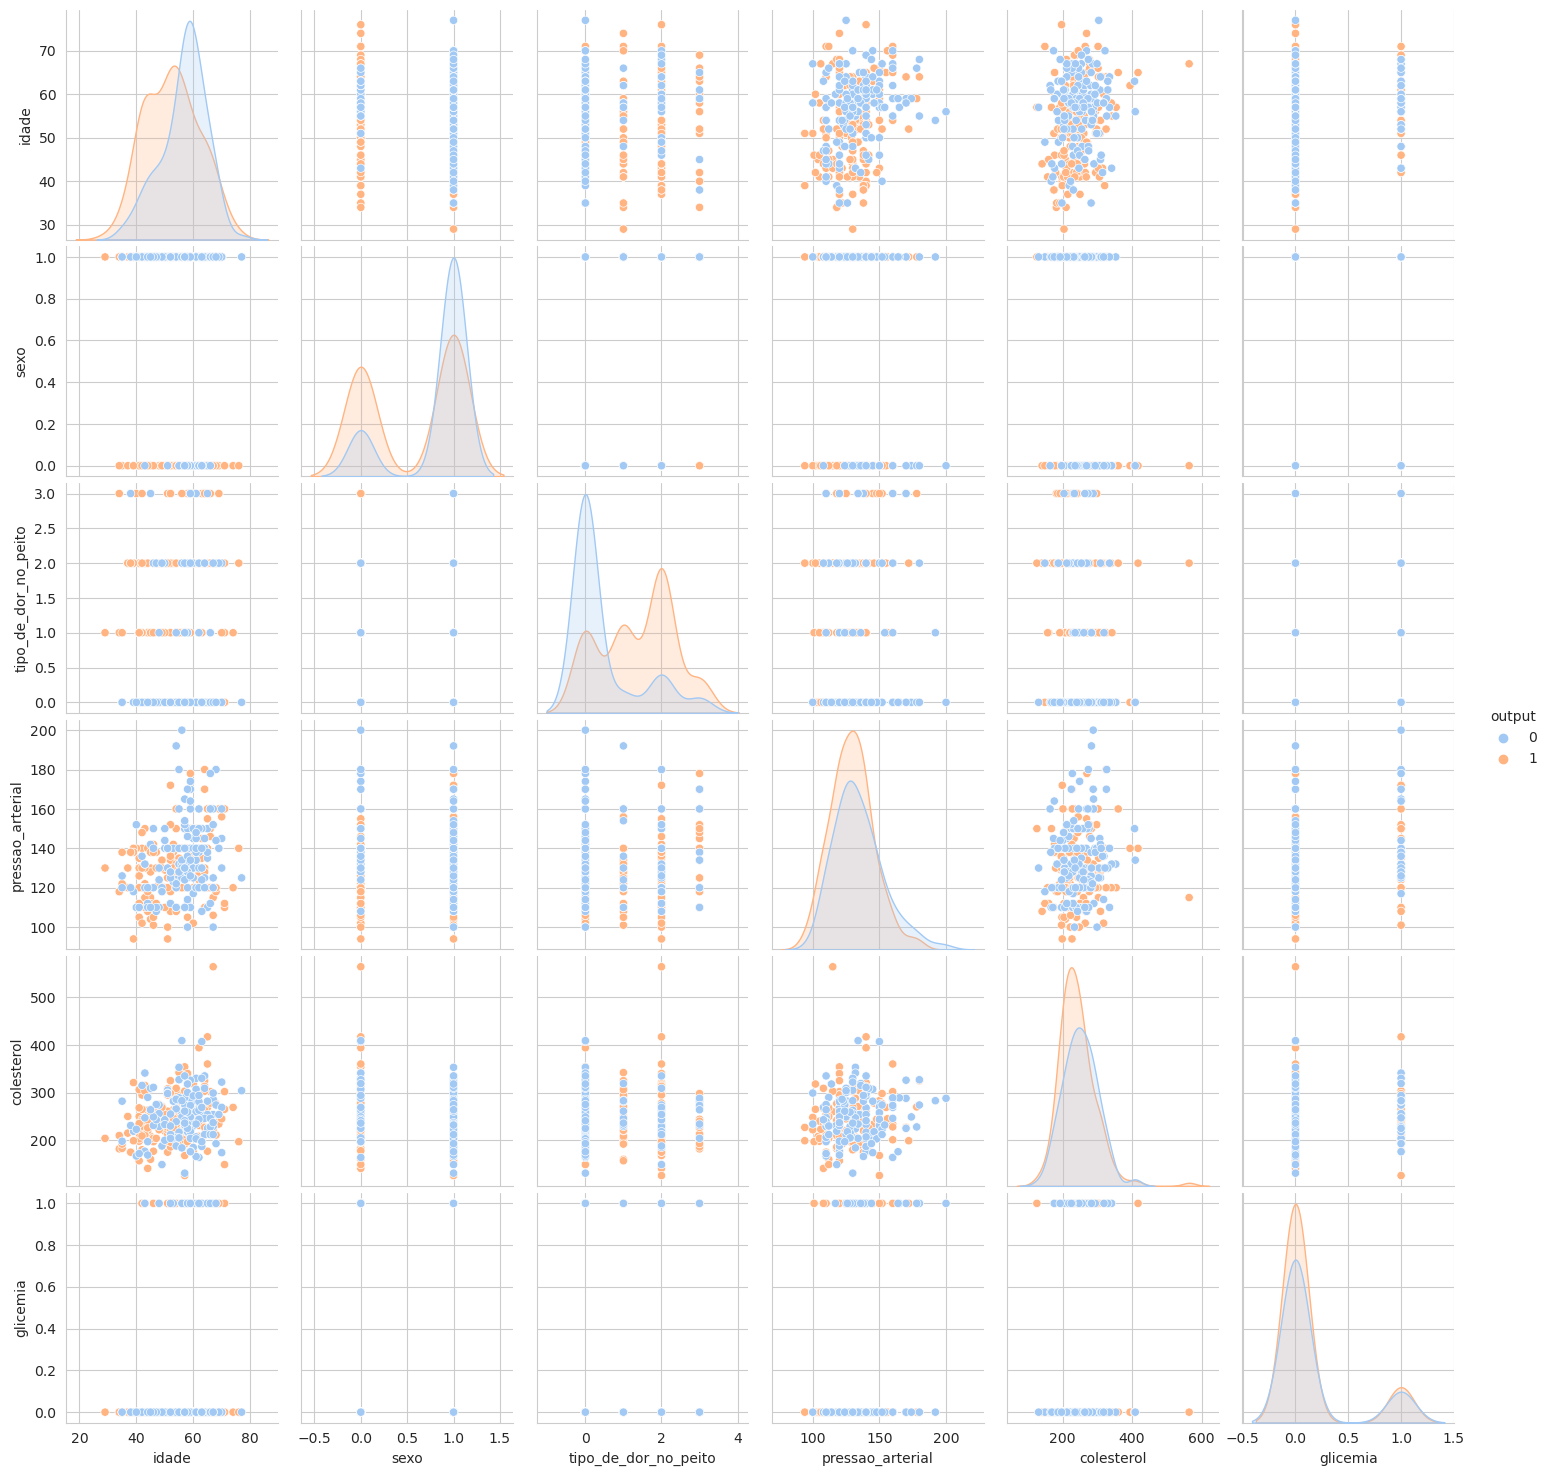

In [21]:
with sns.axes_style('whitegrid'):
  grafico = sns.pairplot(data=dados, hue="output", palette="pastel")

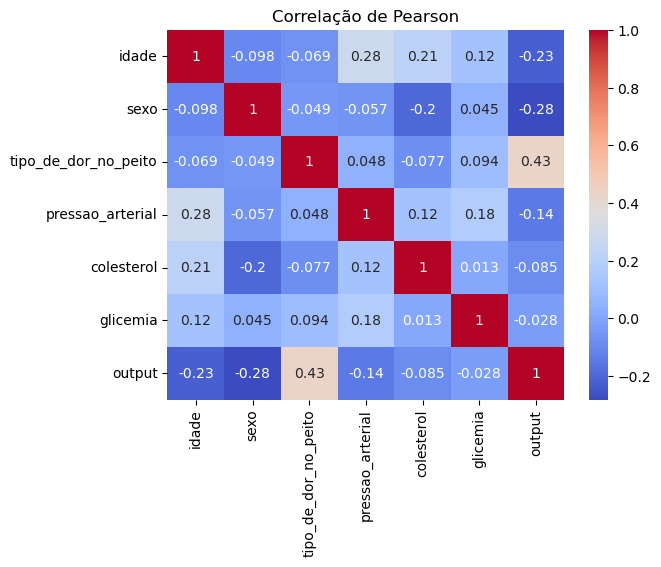

In [22]:
correlação = dados.corr()
sns.heatmap(correlação, annot=True, cmap='coolwarm')
plt.title('Correlação de Pearson')
plt.show()

# Manipulação

* Treino e teste

In [23]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    dados.drop(['output'], axis=1), 
    dados['output'], 
    test_size=0.33, 
    random_state=123
)

In [24]:
predictors_train.head()

,idade,sexo,tipo_de_dor_no_peito,pressao_arterial,colesterol,glicemia
248,54,1,1,192,283,0
37,54,1,2,150,232,0
34,51,1,3,125,213,0
55,52,1,1,134,201,0
91,57,1,0,132,207,0


In [25]:
predictors_train.shape

(203, 6)

In [26]:
predictors_test.head()

,idade,sexo,tipo_de_dor_no_peito,pressao_arterial,colesterol,glicemia
11,48,0,2,130,275,0
292,58,0,0,170,225,1
269,56,1,0,130,283,1
268,54,1,0,122,286,0
94,45,0,1,112,160,0


In [27]:
predictors_test.shape

(100, 6)

In [28]:
target_train.head()

248    0
37     1
34     1
55     1
91     1
Name: output, dtype: int64

In [29]:
target_train.shape

(203,)

In [30]:
target_test.head()

11     1
292    0
269    0
268    0
94     1
Name: output, dtype: int64

In [31]:
target_test.shape

(100,)

In [32]:
model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['idade', 'sexo', 'tipo_de_dor_no_peito', 'pressao_arterial',
        'colesterol', 'glicemia'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x7dbd18f1bde0>}

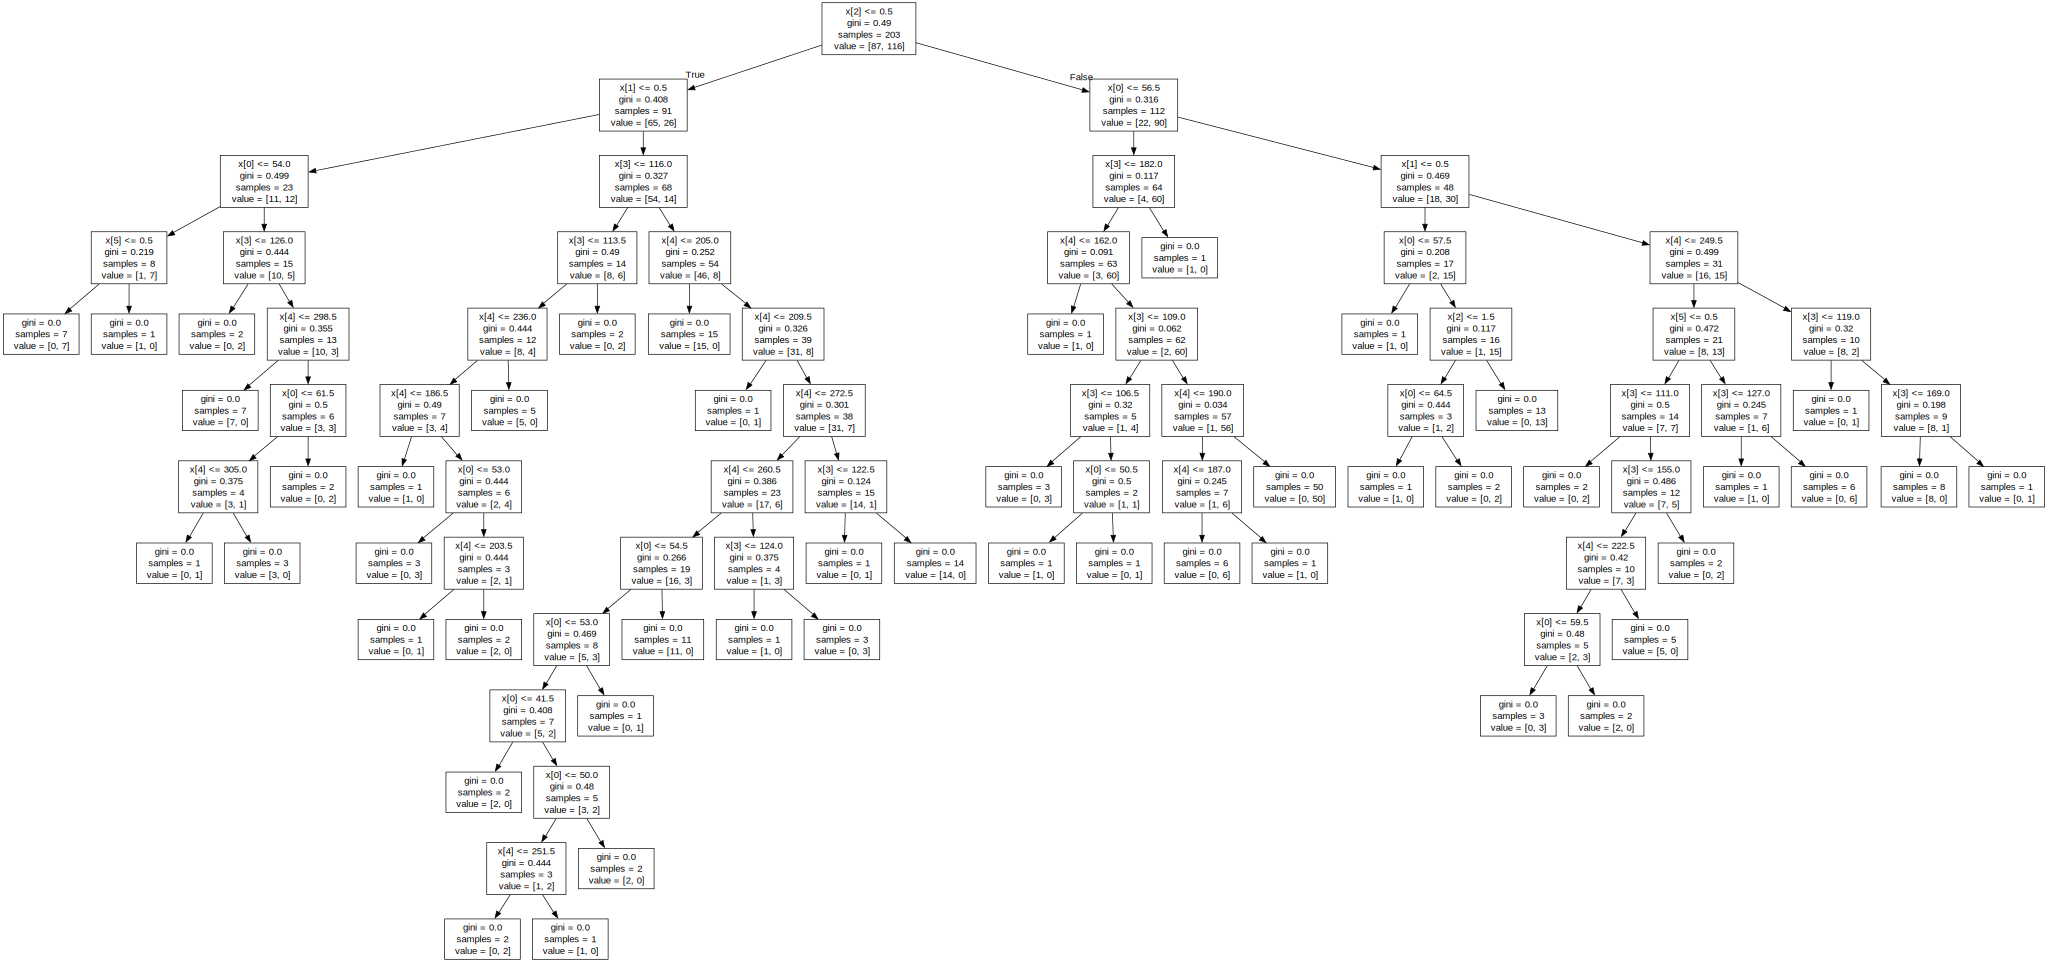

In [33]:
tree_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(tree_data)
graph

In [34]:
target_predicted = model.predict(predictors_test)
target_predicted[0:5]

array([1, 0, 0, 1, 0])

In [35]:
target_predicted.shape

(100,)

In [36]:
target_test[0:5]

11     1
292    0
269    0
268    0
94     1
Name: output, dtype: int64

In [37]:
target_test.shape

(100,)

In [38]:
CM=confusion_matrix(target_test, target_predicted)
print(CM)

[[26 25]
 [11 38]]


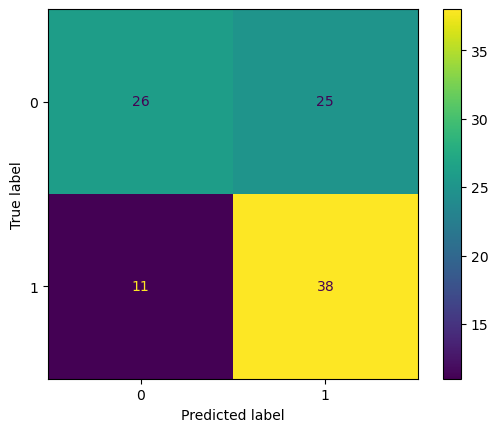

In [39]:
CM=confusion_matrix(target_test, target_predicted, labels= model.classes_)
Cmd= ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
Cmd.plot()

In [40]:
dados.head()

,idade,sexo,tipo_de_dor_no_peito,pressao_arterial,colesterol,glicemia,output
0,63,1,3,145,233,1,1
1,37,1,2,130,250,0,1
2,41,0,1,130,204,0,1
3,56,1,1,120,236,0,1
4,57,0,0,120,354,0,1


In [41]:
caracteristicas = np.array([63,1,3,145,233,1])
prediction = model.predict(caracteristicas.reshape(1, -1))

print(prediction)

[1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)

0.64


In [43]:
recall = recall_score(target_test, target_predicted)
recall

0.7755102040816326

In [44]:
f1 = f1_score(target_test, target_predicted)
f1

0.6785714285714285

## **Conclusão**

* A média de idade dos pacientes é de 54 anos, em sua maioria do sexo masculino e 47% apresentam dor no peito do tipo angina típica.
* As pacientes do sexo feminino apresentam uma média de concentração de colesterol no sangue 8,5% maior que a dos pacientes do sexo masculino.
* 85,1% dos pacientes apresentou resultado de glicemia em jejum menor que 120 mg/dl.
* Através do pairplot podemos observar que entre as mulheres a maioria(75%) tem maior chance de ataque cardíaco e dos pacientes que apresentam dor no peito do tipo angina típica 72% tem menor chance de ataque cardíaco.
* Com o gráfico que apresenta a correlação de pearson foi possível observar que as variáveis apresentam baixa correlação.
* Os métodos de avaliação demonstraram 67% na acurácia,81% no recall e 70% no F1_score.
